In [5]:
print("hello musii")

hello musii


In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

C:\Users\amanr\AppData\Local\Temp\ipykernel_4624\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 421 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

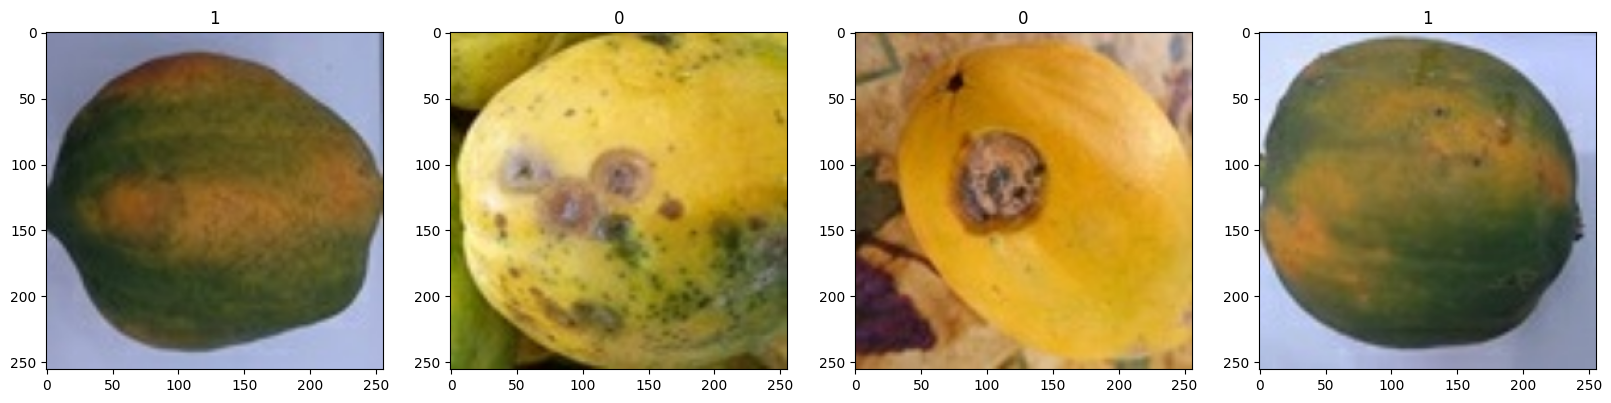

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[5.68627477e-01, 6.03921592e-01, 7.17647076e-01],
          [5.68290412e-01, 6.03584588e-01, 7.17310071e-01],
          [5.66758573e-01, 6.02052689e-01, 7.15778172e-01],
          ...,
          [6.82169139e-01, 7.17463255e-01, 8.70404422e-01],
          [6.79105401e-01, 7.14399517e-01, 8.67340684e-01],
          [6.78431392e-01, 7.13725507e-01, 8.66666675e-01]],
 
         [[5.68290412e-01, 6.03584588e-01, 7.17310071e-01],
          [5.67982376e-01, 6.03276491e-01, 7.17001975e-01],
          [5.66582203e-01, 6.01876318e-01, 7.15601802e-01],
          ...,
          [6.82169139e-01, 7.17463255e-01, 8.70404422e-01],
          [6.79105401e-01, 7.14399517e-01, 8.67340684e-01],
          [6.78431392e-01, 7.13725507e-01, 8.66666675e-01]],
 
         [[5.66758573e-01, 6.02052689e-01, 7.15778172e-01],
          [5.66582203e-01, 6.01876318e-01, 7.15601802e-01],
          [5.65780342e-01, 6.01074457e-01, 7.14799941e-01],
          ...,
          [6.82169139e-01, 7.17463255e-01, 8.7040

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
val_size

2

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\amanr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 797ms/step - accuracy: 0.5219 - loss: 0.8379 - val_accuracy: 0.9375 - val_loss: 0.3080
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.9170 - loss: 0.2458 - val_accuracy: 0.9844 - val_loss: 0.0689
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.9805 - loss: 0.0452 - val_accuracy: 0.9844 - val_loss: 0.0220
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step - accuracy: 0.9908 - loss: 0.0254 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.9965 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 3.9293e-04
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 413ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.3064e-04
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step - accuracy: 1.0000 - loss: 6.9304e-04 - val_accuracy: 1.0000

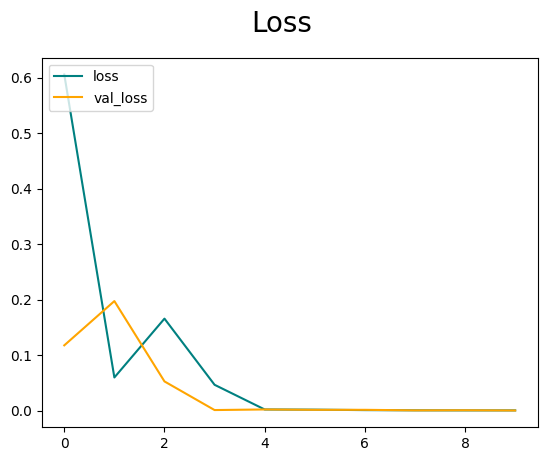

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

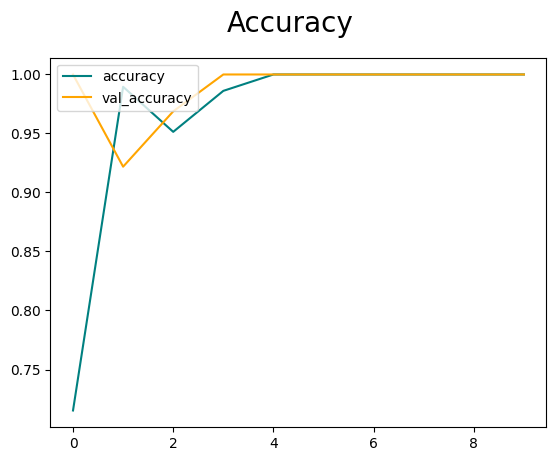

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


In [34]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision:1.0, Recall:1.0, Accuracy:1.0


In [35]:
import cv2

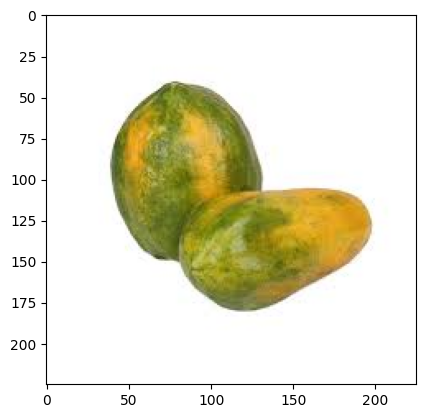

In [36]:
img = cv2.imread('1papaya.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

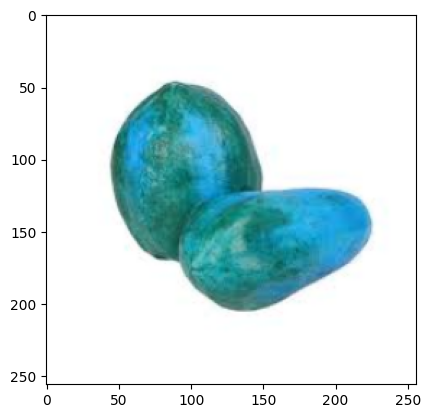

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
resize.shape

TensorShape([256, 256, 3])

In [39]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


array([[7.4101954e-05]], dtype=float32)

In [43]:
if yhat > 0.5: 
    print(f'good')
else:
    print(f'bad')
    

bad


In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('models','goodbad.h5'))

In [45]:
new_model = load_model('models/goodbad.h5')

In [46]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


array([[0.00666132]], dtype=float32)